# Project: Wrangling and Analyze Data

In [1]:
import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df=pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests
r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv', auth=('user', 'pass'))
r.status_code
r.headers['content-type']
with open('image_predictions.tsv', mode='wb') as file:
    file.write(r.content)
    
# Import the tweet image predictions TSV file into a DataFrame
df1 = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
!pip install tweepy

In [ ]:
import tweepy

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)
tweet = api.get_status(tweet_id, tweet_mode='extended')
#api.get_status(id_of_tweet)
print(tweet.text)

In [ ]:
tweet_ids = df.tweet_id.values
len(tweet_ids)
#Writing and Reading Twitter JSON
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [4]:
# List of dictionaries to read tweet's JSON data line by line and later convert to a DataFrame
list = []
with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        status = json.loads(line)
        
        # Append to list of dictionaries
        list.append({'tweet_id': status['id'],
                        'retweet_count': status['retweet_count'],
                        'favorite_count': status['favorite_count'],
                        'display_text_range': status['display_text_range']
                       })

#Create a DataFrame with tweet ID, retweet count, favorite count and display_text_range
df2 = pd.DataFrame(list, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'])

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [6]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

**tweet_id**: the primary key to identify each tweet  

**in_reply_to_status_id:** Indicate whether or not the tweet is  a reply.

**in_reply_to_user_id:** The author ID of the replied tweet.

**timestamp:** The time when this Tweet was created

**source:** From when the tweet was recieved.

**text:** The content of the tweet.

**retweeted_status_id:** Indicate whether or not the tweet is  a retweet.

**retweeted_status_user_id:** The author ID of the retweeted tweet.

**retweeted_status_timestamp:** time of retweet

**expanded_urls:** tweet URL

**rating_numerator:** numerator of the rating of a dog greater than 10

**rating_denominator:** denominator of the rating of a dog.

**name:** name of the dog.

**the various stages of dog:**
>-**doggo**

>-**floofer**

>-**pupper**

>-**puppo**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

>-This dataset contains 17 columns (mentionned before) and 2356 rows.
There are some columns with missing values. (in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,etweeted_status_timestamp) For those 4 columns, missing values could be explained because not every tweet is a retweet or a replied tweet.
expanded_urls column has 59  missing values.

In [8]:
df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1846,675822767435051008,NaN,NaN,2015-12-12 23:41:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",🎶 HELLO FROM THE OTHER SIIIIIIIIDE 🎶 10/10s ht...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675822767...,10,10,None,None,None,None,None
1021,746726898085036033,NaN,NaN,2016-06-25 15:29:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Abby. She's incredibly distracting. Just ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746726898...,12,10,Abby,None,None,None,None
40,884562892145688576,NaN,NaN,2017-07-11 00:00:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kevin. He's just so happy. 13/10 what ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884562892...,13,10,Kevin,None,None,None,None
1367,702598099714314240,NaN,NaN,2016-02-24 20:56:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sansa. She's gotten too big for her ch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/702598099...,11,10,Sansa,None,None,pupper,None
1548,689275259254616065,NaN,NaN,2016-01-19 02:36:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Lucky. He was showing his friends an extr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/689275259...,10,10,Lucky,None,None,None,None


In [9]:
df['in_reply_to_status_id'].unique()

array([             nan,   8.86266357e+17,   8.81607037e+17,
         8.79553827e+17,   8.70726203e+17,   8.63425646e+17,
         6.67152164e+17,   8.57156678e+17,   8.55818117e+17,
         8.56286004e+17,   8.55861584e+17,   8.55858536e+17,
         8.50328819e+17,   8.48212112e+17,   8.47606176e+17,
         7.59099524e+17,   8.40698300e+17,   8.38145499e+17,
         8.38085539e+17,   8.35245984e+17,   8.32087548e+17,
         8.31903044e+17,   8.26598365e+17,   8.23326389e+17,
         8.21152593e+17,   8.13127252e+17,   8.11627233e+17,
         7.33109485e+17,   8.01854331e+17,   8.00857954e+17,
         7.97123751e+17,   7.72743019e+17,   7.66711819e+17,
         7.63865175e+17,   7.50180499e+17,   7.47648654e+17,
         7.46885919e+17,   6.91416866e+17,   7.38411920e+17,
         7.29113531e+17,   7.07980066e+17,   7.03255936e+17,
         7.04485745e+17,   7.03041950e+17,   6.96488711e+17,
         6.75349384e+17,   6.70668383e+17,   6.93642232e+17,
         6.93572216e+17,

In [10]:
df.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [11]:
df['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Terrance', 'Aja',
       'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose',
       'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Dawn',
       'Boomer', 'Cody', 'Rumble', 'Clifford', 'quite', 'Dewey', 'Scout',
       'Gizmo', 'Cooper', 'Harold', 'Shikha', 'Jamesy', 'Lili', 'Sammy',
       'Meatball', 'Paisley', 'Albus', 'Neptune', '

In [13]:
#df['name'].value_counts()

In [12]:
df.duplicated().value_counts()

False    2356
dtype: int64

**Programmatically, there is no duplicated data but The duplicated values are the retweeted tweets.(same information reposted)**

In [13]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


The rating_numerator contains 0 as a minimal value and 1776 as maximum value<br>
The rating_denominator contains 0 as a minimal value and 170 as maximum value<br>
>- The rating numerator contain values more than 10 and the rating denominator isn't fixed at 10.

In [14]:
df1.shape, df.shape

((2075, 12), (2356, 17))

In [15]:
df1.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


>-This dataset contains 12 columns and 2075 rows.

In [17]:
df1.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [18]:
df1.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

**tweet_id:** primary key of this dataset. <br>
**jpg_url:** URL  adress of the image dog; <br>
**img_num:** the image number that corresponded to the most confident prediction <br>
**p1:** the algorithm's #1 prediction for the image in the tweet <br>
**p1_conf:** explain how confident the algorithm is in its #1 prediction<br>
**p1_dog:** whether or not the #1 prediction is a breed of dog<br>
**p2:** the algorithm's second most likely prediction <br>
**p2_conf:** how confident the algorithm is in its #2 prediction<br>
**p2_dog:** whether or not the #2 prediction is a breed of dog<br>
**p3:** the algorithm's #3 prediction for the image in the tweet <br>
**p3_conf:** how confident the algorithm is in its #3 prediction<br>
**p3_dog:** whether or not the #3 prediction is a breed of dog<br>

In [19]:
df1.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1207,742161199639494656,https://pbs.twimg.com/media/CkyvqnNWYAQxQY1.jpg,1,balloon,0.990736,False,punching_bag,0.004754,False,parachute,0.000436,False
1053,714214115368108032,https://pbs.twimg.com/media/Cell8ikWIAACCJ-.jpg,1,pug,0.533967,True,bloodhound,0.164826,True,German_shepherd,0.046524,True
1819,834209720923721728,https://pbs.twimg.com/media/C5O1UAaWIAAMBMd.jpg,1,golden_retriever,0.754799,True,Pekinese,0.197861,True,Labrador_retriever,0.008654,True
181,669328503091937280,https://pbs.twimg.com/media/CUnuuLEWEAAlKjN.jpg,1,Siberian_husky,0.424202,True,Eskimo_dog,0.237660,True,malamute,0.052572,True
697,684538444857667585,https://pbs.twimg.com/ext_tw_video_thumb/68453...,1,Chihuahua,0.702583,True,Siamese_cat,0.068218,False,macaque,0.043325,False


In [20]:
df2.head()

,tweet_id,retweet_count,favorite_count,display_text_range
0,892420643555336193,8853,39467,"[0, 85]"
1,892177421306343426,6514,33819,"[0, 138]"
2,891815181378084864,4328,25461,"[0, 121]"
3,891689557279858688,8964,42908,"[0, 79]"
4,891327558926688256,9774,41048,"[0, 138]"


In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id              2354 non-null int64
retweet_count         2354 non-null int64
favorite_count        2354 non-null int64
display_text_range    2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


>- This Dataset contains 2354 rows and 4 columns 

In [22]:
df2.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'display_text_range'], dtype='object')

**tweet_id:** the primary key which identify each tweet <br>
**retweet_count:**  the number of times of retweet <br>
**favorite_count:** indicates the number of time that the  Tweet has been liked.<br>
**display_text_range:** identify the start and the end of the content of the Tweet <br>

In [23]:
df2.sample(5)

,tweet_id,retweet_count,favorite_count,display_text_range
600,798665375516884993,4519,0,"[0, 119]"
660,791026214425268224,4858,0,"[0, 102]"
1555,688804835492233216,227,1043,"[0, 96]"
1127,729463711119904772,2586,6340,"[0, 58]"
1781,677673981332312066,1677,3603,"[0, 137]"


In [24]:
#Checking if the tweet id are involved in the df1 dataset 
df.tweet_id.isin(df1.tweet_id).value_counts()

True     2075
False     281
Name: tweet_id, dtype: int64

In [26]:
#There are 281 tweet id missing in the df1 dataset

### Quality issues
1. For the df Dataset, the source column contain more information than those wanted: split the content and let just the source of the tweet apear.<br>

2. The duplicated values are the retweeted tweets.(same information reposted)<br>

3. Drop the retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns after the step above  . <br>

4. The rating denominator isn't fixed at 10.<br>

5. Errors in  the name of dog. 

6. There are some missing tweet_id that exist in the df Dataset but not in the df1 dataset.

7. timestamp datatype to datetime.

8. in_reply_to_status_id, in_reply_to_user_id from float to int. 

### Tidiness issues
1. The various stages of dog (doggo, floofer, pupper and puppo) should be in one column 

2. We should concatenate df and df2 dataset

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [25]:
# Make copies of original pieces of data
df_clean= df.copy()

### Issue #1:  For the df Dataset, the source column contain more information than those wanted.

#### Define:  Split the content and let just the source of the tweet apear.

#### Code

In [26]:
df_clean['source']=df_clean['source'].apply(lambda x:x.split("/")[-2])
df_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"iphone"" rel=""nofollow"">Twitter for iPhone<",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"iphone"" rel=""nofollow"">Twitter for iPhone<",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"iphone"" rel=""nofollow"">Twitter for iPhone<",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


#### Test

In [27]:
df_clean['source'].unique()

array(['iphone" rel="nofollow">Twitter for iPhone<',
       'twitter.com" rel="nofollow">Twitter Web Client<',
       'vine.co" rel="nofollow">Vine - Make a Scene<',
       'tweetdeck" rel="nofollow">TweetDeck<'], dtype=object)

### Issue #2: The duplicated values are the retweeted tweets.(same information reposted)

#### Define: remove the rows where the retweeted_status_id column contain a value.

#### Code

In [28]:
    df_clean = df_clean[~df_clean['retweeted_status_id'].notnull()]

#### Test

In [29]:
df_clean['retweeted_status_id'].unique()

array([ nan])

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

### Issue #3:  Drop the  retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp   columns.

#### Define: 

This step makes the columns retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp with no values so we have to drop it.

#### Code: 

In [31]:
#Drop retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp columns.
df_clean= df_clean.drop(['retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

#### Test: 

In [32]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


### Issue #4: The rating denominator isn't fixed at 10.

#### Define: Correct the errors existed and drop out the rows  with denominator  value's  different to 10 .

#### Code

In [33]:
#Different rating numerator values
df_clean['rating_numerator'].unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,  182,
         15,  960,    0,    7,   84,   24,   75,   27,    3,    8,    9,
          4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,    1,
        143,  121,   20,   26,    2,  144,   88])

In [34]:
df_clean['rating_numerator'].value_counts().sort_index()

0         2
1         8
2         9
3        19
4        17
5        36
6        32
7        54
8        98
9       156
10      442
11      426
12      500
13      307
14       43
15        1
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

**It appears that the most frequet rating_numerator is between 10 and 13**
>- Let's consider to check the values less than 10 and higher than 13 to see if the denominator is 10.

In [35]:
#define a mask to detect the rows havins a rating denominator different than 10
deno= df_clean[(df_clean.rating_denominator !=10)]
deno.index

Int64Index([ 313,  342,  433,  516,  902, 1068, 1120, 1165, 1202, 1228, 1254,
            1274, 1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843, 2335],
           dtype='int64')

In [36]:
len(deno.index)

22

In [37]:
deno.rating_numerator.unique()

array([960,  11,  84,  24, 165,   9, 204,   4,  50,  99,  80,  45,  60,
        44, 143, 121,   7,  20, 144,  88,   1])

In [38]:
with pd.option_context('display.max_colwidth', 100000):
    display(deno)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"iphone"" rel=""nofollow"">Twitter for iPhone<","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"iphone"" rel=""nofollow"">Twitter for iPhone<",@docmisterio account started on 11/15/15,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"iphone"" rel=""nofollow"">Twitter for iPhone<",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"iphone"" rel=""nofollow"">Twitter for iPhone<",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"iphone"" rel=""nofollow"">Twitter for iPhone<",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"iphone"" rel=""nofollow"">Twitter for iPhone<","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"iphone"" rel=""nofollow"">Twitter for iPhone<",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"iphone"" rel=""nofollow"">Twitter for iPhone<",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"iphone"" rel=""nofollow"">Twitter for iPhone<",This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,https://twitter.com/dog_rates/status/716439118184652801/photo/1,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"iphone"" rel=""nofollow"">Twitter for iPhone<",Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,https://twitter.com/dog_rates/status/713900603437621249/photo/1,99,90,None,None,None,None,None


Correct those errors.

In [39]:
deno.to_csv('deno.csv')

**After scrolling the rating_numerator and denominator_numerator columns there are errors in those specific lines mentionned below the other values was included without errors and the denominator is different than 10.**

In [40]:
df_clean.rating_numerator[deno.index[0]]=13
df_clean.rating_numerator[deno.index[4]]=14
df_clean.rating_numerator[deno.index[6]]=13
df_clean.rating_numerator[deno.index[7]]=11
df_clean.rating_numerator[deno.index[16]]=10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-p

In [41]:
df_clean.rating_denominator[deno.index[0]]=10
df_clean.rating_denominator[deno.index[4]]=10
df_clean.rating_denominator[deno.index[6]]=10
df_clean.rating_denominator[deno.index[7]]=10
df_clean.rating_denominator[deno.index[16]]=10

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-p

>-**I will drop out the other values which their dominator is different than 10.**

In [42]:
df_clean[(df_clean.rating_denominator !=10)].index

Int64Index([ 342,  433,  516, 1068, 1202, 1228, 1254, 1274, 1351, 1433, 1598,
            1634, 1662, 1663, 1779, 1843, 2335],
           dtype='int64')

In [43]:
df_clean.drop(df_clean[(df_clean.rating_denominator !=10)].index, inplace=True)

#### Test

In [44]:
df_clean[(df_clean.rating_denominator !=10)].index

Int64Index([], dtype='int64')

In [45]:
df_clean['rating_denominator'].value_counts().sort_index()

10    2158
Name: rating_denominator, dtype: int64

### Issue #5: Errors in the name of dog.

#### Define:  Some names are not right, we  will replace them with None to indicate a missing value instead of an error.

#### Code

In [46]:
df_clean['name'][df_clean['name'].str.match('[a-z]+')] = 'None'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Test

In [47]:
df_clean.name[df_clean.name == 'None'].value_counts()

None    770
Name: name, dtype: int64

In [48]:
df_clean.name.value_counts().sort_index()

Abby            2
Ace             1
Acro            1
Adele           1
Aiden           1
Aja             1
Akumi           1
Al              1
Albert          2
Albus           2
Aldrick         1
Alejandro       1
Alexander       1
Alexanderson    1
Alf             1
Alfie           4
Alfy            1
Alice           2
Amber           1
Ambrose         1
Amy             1
Amélie          1
Anakin          1
Andru           1
Andy            1
Angel           1
Anna            1
Anthony         1
Antony          1
Apollo          1
               ..
Walker          1
Wallace         3
Wally           2
Walter          3
Watson          2
Wesley          1
Wiggles         1
Willem          1
William         1
Willie          1
Willow          1
Willy           1
Wilson          3
Winifred        1
Winnie          4
Winston         8
Wishes          1
Wyatt           3
Yoda            1
Yogi            2
Yukon           1
Zara            1
Zeek            1
Zeke            3
Zeus      

### Issue #6: There are some missing tweet_id that exist in the df Dataset but not in the df1 dataset.

#### Define: leaving only the records existing in both datasets df and df1.

#### Code

In [49]:
df_clean = df_clean[~df.tweet_id.isin(df1.tweet_id)== False]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


#### Test

In [50]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 1980 non-null int64
in_reply_to_status_id    22 non-null float64
in_reply_to_user_id      22 non-null float64
timestamp                1980 non-null object
source                   1980 non-null object
text                     1980 non-null object
expanded_urls            1980 non-null object
rating_numerator         1980 non-null int64
rating_denominator       1980 non-null int64
name                     1980 non-null object
doggo                    1980 non-null object
floofer                  1980 non-null object
pupper                   1980 non-null object
puppo                    1980 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 232.0+ KB


### Issue #7: timestamp datatype to datetime.

#### Define: Change the timestamp column type to datetime 

#### Code

In [51]:
df_clean['timestamp']=df_clean.timestamp.astype('datetime64[ns]')

#### Test

In [52]:
df_clean.dtypes

tweet_id                          int64
in_reply_to_status_id           float64
in_reply_to_user_id             float64
timestamp                datetime64[ns]
source                           object
text                             object
expanded_urls                    object
rating_numerator                  int64
rating_denominator                int64
name                             object
doggo                            object
floofer                          object
pupper                           object
puppo                            object
dtype: object

### Issue #8: in_reply_to_status_id, in_reply_to_user_id from float to int.

#### Define: Change the in_reply_to_status_id, in_reply_to_user_id columns type to int

#### Code

In [53]:
df_clean.in_reply_to_status_id = df_clean.in_reply_to_status_id.fillna(0)
df_clean.in_reply_to_user_id = df_clean.in_reply_to_user_id.fillna(0)
df_clean['in_reply_to_status_id'] = df_clean['in_reply_to_status_id'].astype(np.int64)
df_clean['in_reply_to_user_id'] = df_clean['in_reply_to_user_id'].astype(np.int64)

#### Test

In [54]:
df_clean.dtypes

tweet_id                          int64
in_reply_to_status_id             int64
in_reply_to_user_id               int64
timestamp                datetime64[ns]
source                           object
text                             object
expanded_urls                    object
rating_numerator                  int64
rating_denominator                int64
name                             object
doggo                            object
floofer                          object
pupper                           object
puppo                            object
dtype: object

## Tidiness

### Issue #1: the various stages of dog (doggo, floofer, pupper and puppo) should be in one column.

#### Define: Merge the columns into one stage of the dog.

In [55]:
df_clean['stage'] = df_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [56]:
df_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace= True)

In [57]:
df_clean.stage.unique()

array(['None', 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

#### Test

In [58]:
df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'stage'],
      dtype='object')

### Issue #2: Concatenate  df and df2 dataset.

In [59]:
newdf_clean_merge= pd.merge(pd.DataFrame(df_clean), pd.DataFrame(df2), left_on=['tweet_id'],right_on=['tweet_id'],how='left')
newdf_clean_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1979
Data columns (total 14 columns):
tweet_id                 1980 non-null int64
in_reply_to_status_id    1980 non-null int64
in_reply_to_user_id      1980 non-null int64
timestamp                1980 non-null datetime64[ns]
source                   1980 non-null object
text                     1980 non-null object
expanded_urls            1980 non-null object
rating_numerator         1980 non-null int64
rating_denominator       1980 non-null int64
name                     1980 non-null object
stage                    1980 non-null object
retweet_count            1980 non-null int64
favorite_count           1980 non-null int64
display_text_range       1980 non-null object
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 232.0+ KB


In [60]:
newdf_clean_merge.drop('display_text_range', axis=1, inplace=True)

#### Test

In [61]:
newdf_clean_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1980 entries, 0 to 1979
Data columns (total 13 columns):
tweet_id                 1980 non-null int64
in_reply_to_status_id    1980 non-null int64
in_reply_to_user_id      1980 non-null int64
timestamp                1980 non-null datetime64[ns]
source                   1980 non-null object
text                     1980 non-null object
expanded_urls            1980 non-null object
rating_numerator         1980 non-null int64
rating_denominator       1980 non-null int64
name                     1980 non-null object
stage                    1980 non-null object
retweet_count            1980 non-null int64
favorite_count           1980 non-null int64
dtypes: datetime64[ns](1), int64(7), object(5)
memory usage: 216.6+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [62]:
newdf_clean_merge.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

**We'll analyze those points:** <br>
>- The most source used for the tweets.<br>
>- The most attributed numerator rating.<br>
>- The distribution of ineteraction with the twitter account post's over time.<br>
>- **The distribution of tweets over years.**<br>

In [63]:
data= pd.read_csv('twitter_archive_master.csv')

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 13 columns):
tweet_id                 1980 non-null int64
in_reply_to_status_id    1980 non-null int64
in_reply_to_user_id      1980 non-null int64
timestamp                1980 non-null object
source                   1980 non-null object
text                     1980 non-null object
expanded_urls            1980 non-null object
rating_numerator         1980 non-null int64
rating_denominator       1980 non-null int64
name                     1980 non-null object
stage                    1980 non-null object
retweet_count            1980 non-null int64
favorite_count           1980 non-null int64
dtypes: int64(7), object(6)
memory usage: 201.2+ KB


In [65]:
data.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
0,892420643555336193,0,0,2017-08-01 16:23:56,"iphone"" rel=""nofollow"">Twitter for iPhone<",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,8853,39467
1,892177421306343426,0,0,2017-08-01 00:17:27,"iphone"" rel=""nofollow"">Twitter for iPhone<",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,6514,33819
2,891815181378084864,0,0,2017-07-31 00:18:03,"iphone"" rel=""nofollow"">Twitter for iPhone<",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,4328,25461


In [66]:
#Source of tweets
data.source.value_counts()

iphone" rel="nofollow">Twitter for iPhone<         1941
twitter.com" rel="nofollow">Twitter Web Client<      28
tweetdeck" rel="nofollow">TweetDeck<                 11
Name: source, dtype: int64

Text(0.5,1,'Source of tweets ')

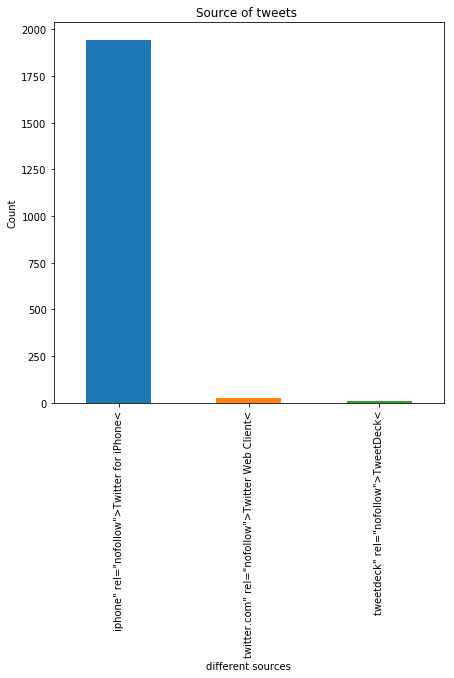

In [67]:
data.source.value_counts().plot(kind='bar', figsize=(7,7))
plt.xlabel("different sources")
plt.ylabel("Count")
plt.title("Source of tweets ")

>-**Most of tweets are from iPhone.**

Text(0.5,1,'the most used rating ')

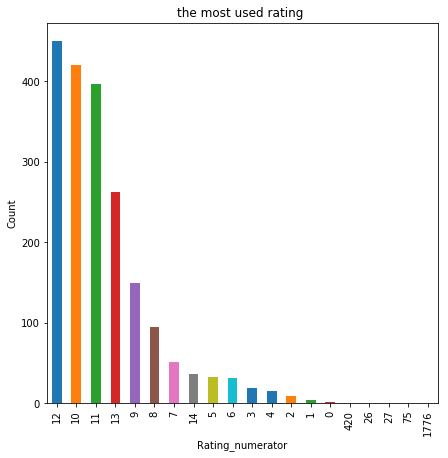

In [71]:
#the most used rating 
data.rating_numerator.value_counts().plot(kind='bar', figsize=(7,7))
plt.xlabel("Rating_numerator")
plt.ylabel("Count")
plt.title("the most used rating ")

>-**The most attributed rating is 12.**

In [73]:
data['timestamp']=data.timestamp.astype('datetime64[ns]')

Text(0.5,1,'The distribution of tweets over years')

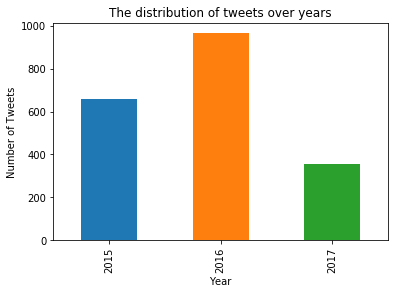

In [74]:
#The distribution of tweets over years
data.tweet_id.groupby(data["timestamp"].dt.year).count().plot(kind='bar')
plt.xlabel("Year")
plt.ylabel("Number of Tweets")
plt.title("The distribution of tweets over years")

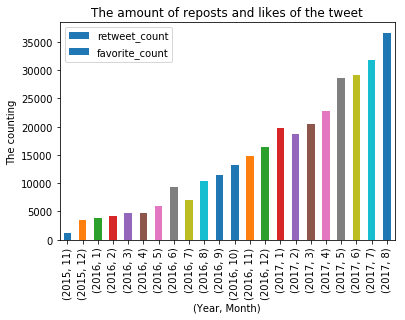

In [75]:
data.retweet_count.groupby([data["timestamp"].dt.year, data["timestamp"].dt.month]).mean().plot(kind='bar')
data.favorite_count.groupby([data["timestamp"].dt.year, data["timestamp"].dt.month]).mean().plot(kind='bar')
plt.title('The amount of reposts and likes of the tweet')
plt.ylabel('The counting')
plt.xlabel('(Year, Month)')
plt.legend(('retweet_count', 'favorite_count'))

>- **The interaction spade was in 2017.**